In [103]:
import numpy as np
from xrdc import xrdutils as xdu
from xrdc import simulation as sim

from xrdc import simulation
from xrdc import datasets as xd
import matplotlib.pyplot as plt

from xrdc import featurization as feat
from xrdc import source_separation as sep
from xrdc import peak_fitting as pf
from xrdc.datasets import d2d

def sample_peak_intensity():
    return np.random.uniform()

# https://stackoverflow.com/questions/35282456/find-local-maximums-in-numpy-array
import pandas as pd
from scipy.signal import argrelextrema

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


def get_ridges(orig, axis = 1):
    # determine the indices of the local maxima
    max_ind = argrelextrema(orig, np.greater, axis = axis)
#     max_ind_2 = argrelextrema(orig, np.greater, axis = 0)
#     max_ind = np.hstack((max_ind[0], max_ind_2[0])), np.hstack((max_ind[1], max_ind_2[1]))
    
    edges = np.zeros_like(orig)
    edges[max_ind] = 1
    return edges

def shuffle(bin_img, size = 1):
    ret = np.zeros_like(bin_img)
    for s in range(-size, size + 1):
        ret += np.roll(bin_img, s, axis = 0)
        ret += np.roll(bin_img, s, axis = 1)
    return np.sign(ret)

In [20]:
from importlib import reload
reload(feat)

<module 'xrdc.featurization' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/featurization.py'>

In [108]:
reload(feat)

<module 'xrdc.featurization' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/featurization.py'>

In [ ]:
labeled, feature_masks, activations, activations_n0, activations_n1 = feat.get_ridge_features(patterns,
   smooth_ax1 = 'FWHM', smooth_ax0 = 2, threshold_percentile = 50, thicken = True, size_thresh = 2, bgsub=False,
    log_scale_features = False, fwhm_finder=fwhm_finder, do_flood_thicken = False, max_size_flood = 20,
    flood_threshold=.95)

In [111]:
labeled, feature_masks, activations, activations_n0, activations_n1 = feat.get_ridge_features(patterns,
   smooth_ax1 = 'FWHM', smooth_ax0 = 2, threshold_percentile = 50, thicken = True,
    size_thresh = 30,
    bgsub=False, log_scale_features = False, fwhm_finder=lambda x: 5, do_flood_thicken = False, max_size_flood = 20,
    flood_threshold=.95, a = 2, b = 3);

TypeError: type str doesn't define __round__ method

In [3]:
from scipy.ndimage.filters import gaussian_filter as gf

In [104]:
patterns = d2d.patterns
slow_q, fast_q, slow_T, fast_T = sep.separate_signal(patterns, cutoff = .25,  threshold = 50, smooth_q = 1.7)
background = slow_q

(0, 0)


Peak at 69, start iteration with error = 0.5545020976281996
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231

25
25.16454159500381
25.16454159500381
{'linkage': 'ward', 'affinity': 'euclidean'}


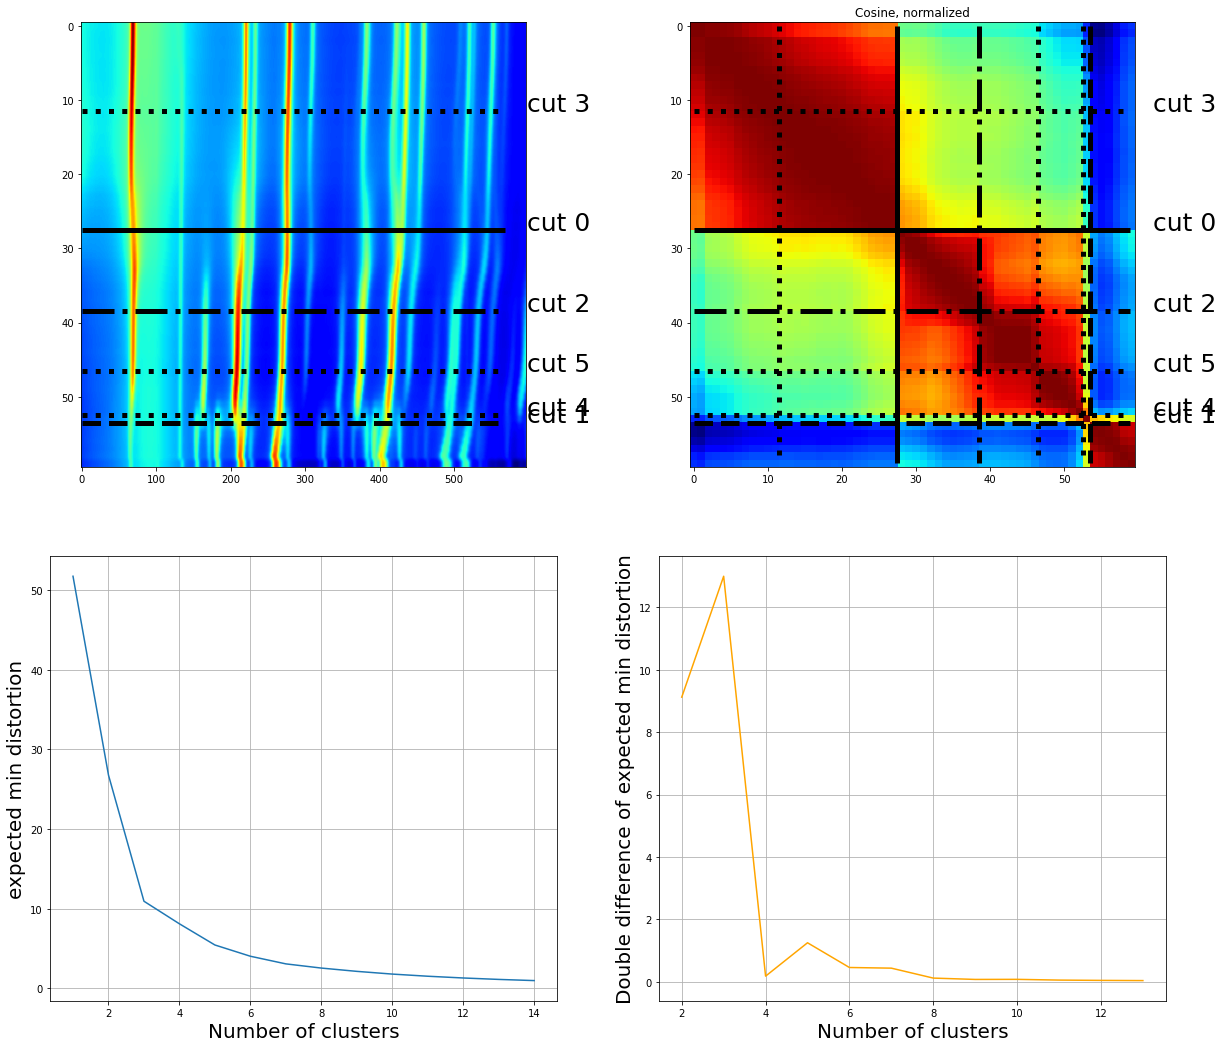

In [120]:
def default_featurize(patterns_pp):
    #patterns_pp = gf(patterns, (1, 1.7))
    labeled, feature_masks, activations, norm_, activations_n1 = feat.get_ridge_features(
        patterns_pp,
       smooth_ax1 = 'FWHM', smooth_ax0 = 1, threshold_percentile = 75, thicken = True, size_thresh = 5, bgsub=False,
        log_scale_features = False, fwhm_finder=feat.fwhm_finder, do_flood_thicken = False, max_size_flood = 20,
        thicken_ax0 = 0, thicken_ax1 = 1, flood_threshold=.95, smooth_factor_ax1 = .125)
    return labeled, feature_masks, activations, norm_, activations_n1

patterns_pp_simple = fast_q * (fast_q > 0)
labeled_simple, feature_masks_simple, activations_simple, _norm, activations_n1_simple =\
    default_featurize(patterns_pp_simple);
# straightened_heatmap_simple = feat.get_peakshift_corrected_heatmap(patterns_pp_simple, activations_simple, labeled_simple)

def get_activations(patterns_pp_simple):
    activations_n1_simple = feat.norm((feature_masks_simple * patterns_pp_simple).sum(axis = 2), axis = 1)
    return activations_n1_simple

act = get_activations(fast_q * (fast_q > 0))

simtype = 'Cosine'
scaling = 'log'
linkage = 'ward'
ctype = 'agglom'

feature_csims1, o_cuts = feat.sims_with_boundaries(patterns, act, act, n = 7, simtype = simtype, extra_label='',
                    ctype = ctype, linkage = linkage, affinity = 'euclidean')

<IPython.core.display.Javascript object>


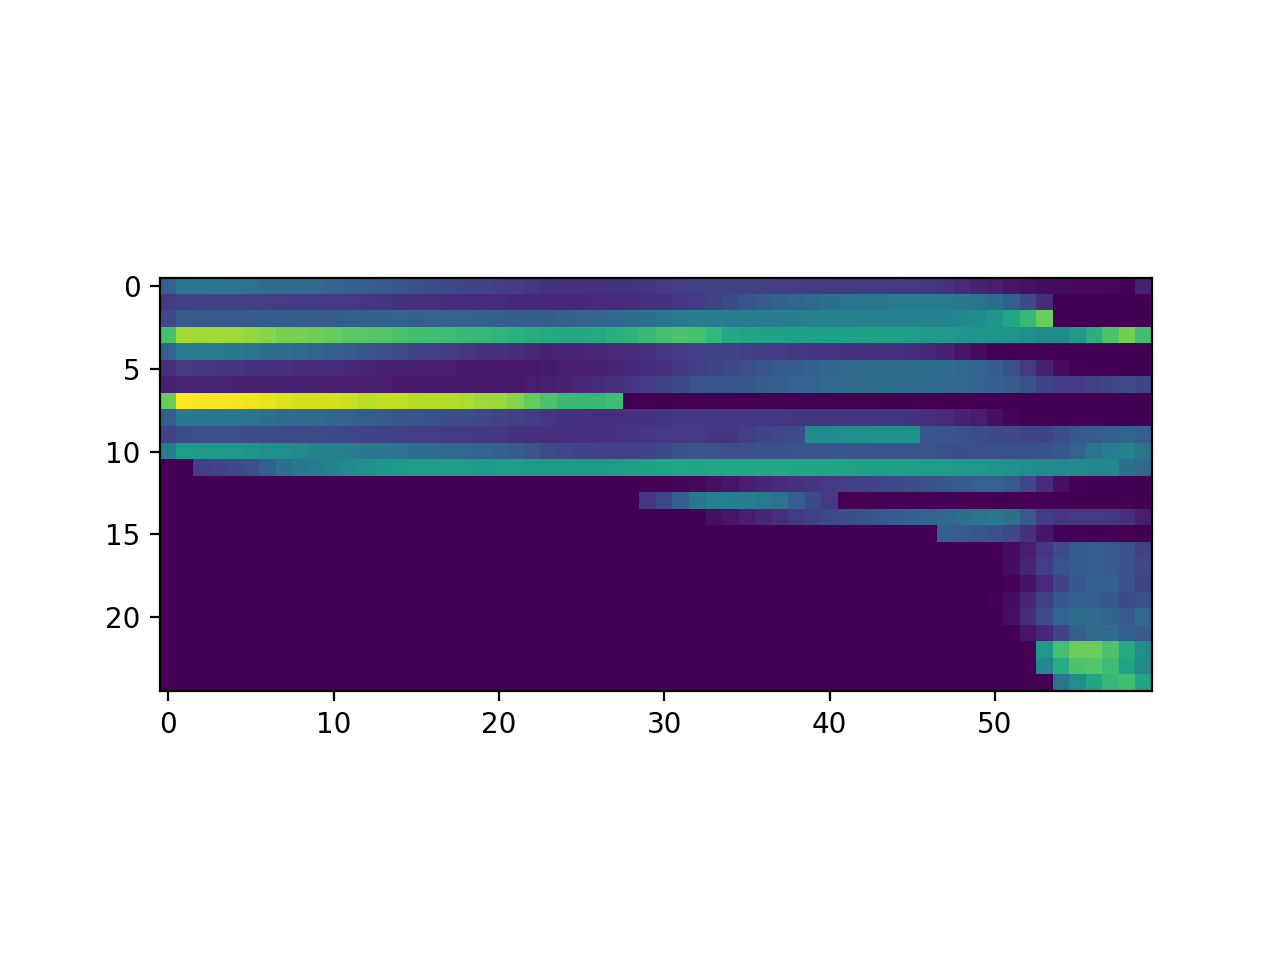

In [546]:
plt.imshow(act)

In [5]:
# fsub_stop_2d = pf.curvefit_2d((patterns - 0), stdratio_threshold = 2, noise_estimate = fast_T,
#                    background = background, bg_shift_pos = False)



In [36]:
N = 10
np.random.normal(size = N * np.prod((patterns.shape))).reshape((N,) + patterns.shape) * fast_T

(10, 60, 597)

In [63]:
np.random.normal(size = N * np.prod((patterns.shape))).reshape((N,) + patterns.shape).mean()

0.0001910173114933509

In [72]:
def sample(signal_estimate, noise_estimate, N = 100):
    """
    Given data matrix and matrix of estimates of the noise standard deviation,
    ............ todo"""
    gaussian_noise = np.random.normal(size = N * np.prod((signal_estimate.shape))).reshape((N,)\
                                                                        + signal_estimate.shape)
    noise_samples = noise_estimate * gaussian_noise
    #return noise_samples
    return signal_estimate + noise_samples

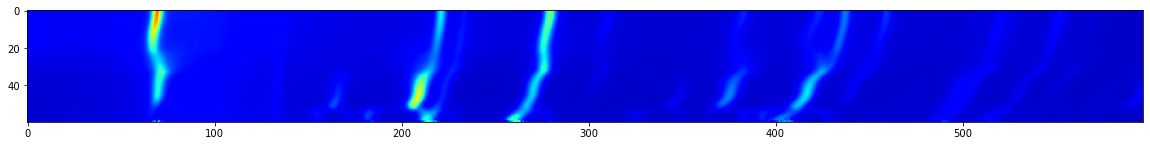

In [73]:
plt.imshow(sample(patterns, fast_T)[1], cmap = 'jet')

In [518]:
N = 2000

# TODO fast_q or slow_T - background?
data_samples = sample(fast_q * (fast_q > 0), fast_T, N = N)

In [519]:
%%capture 
X_samples = np.array([get_activations(sample).T for sample in data_samples]);

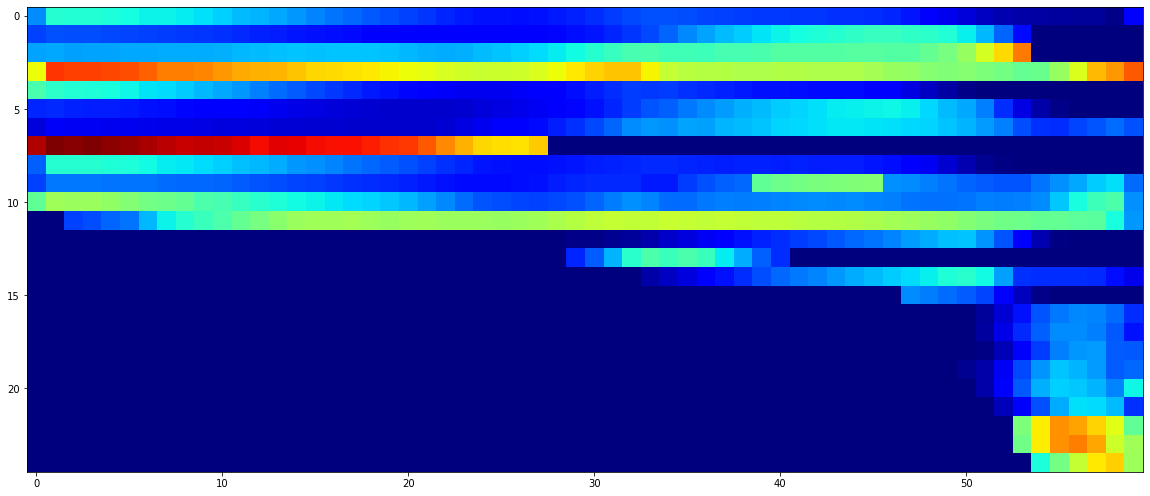

In [128]:
plt.imshow(X_samples[0].T, cmap = 'jet')

<ipython-input-78-cc98622538dd>:1: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(1 + fast_q), cmap = 'jet')


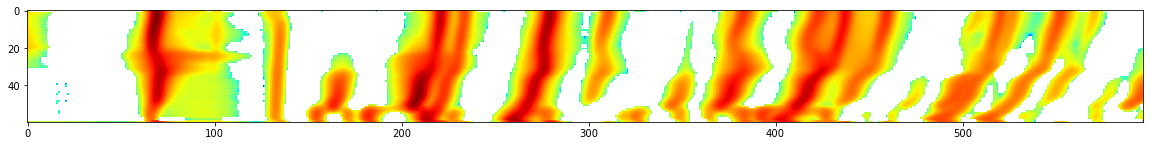

In [78]:
plt.imshow(np.log(1 + fast_q), cmap = 'jet')

<ipython-input-77-c8fb956aa827>:1: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(1 + samples[0]), cmap = 'jet')


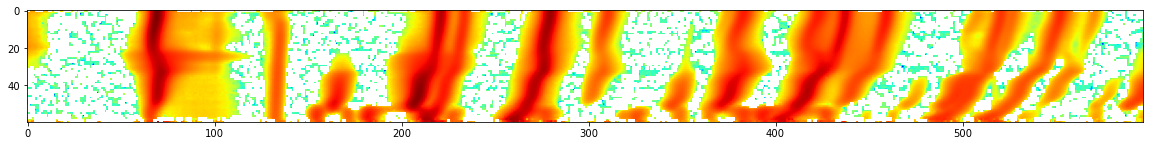

In [77]:
plt.imshow(np.log(1 + samples[0]), cmap = 'jet')

In [7]:
# patterns_pp = fast_q - fast_q.min()
# patterns_pp /= patterns_pp.mean()
# fitlists = fsub_stop_2d[1]

# labeled, feature_masks, activations, norm_, activations_n1 = feat.peakfit_featurize(patterns_pp, fitlists,
#                                                                     size_thresh = 5, peakwidth = 1.5)

In [7]:
from xrdc import misc

{'linkage': 'ward', 'affinity': 'euclidean'}


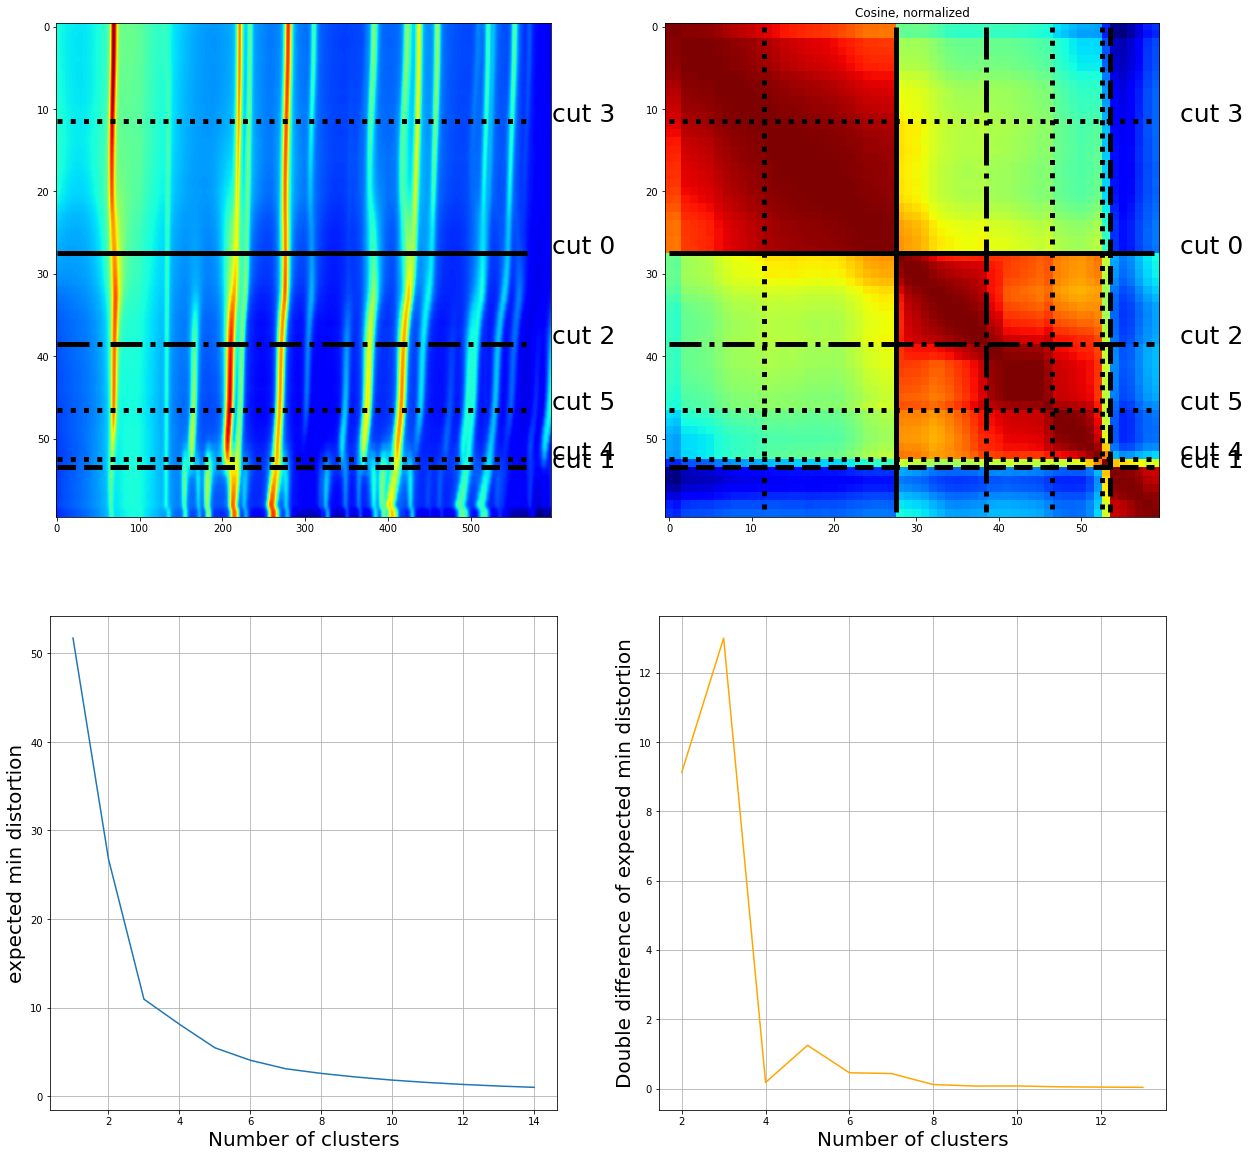

In [87]:
simtype = 'Cosine'
scaling = 'log'
linkage = 'ward'
ctype = 'agglom'

feature_csims1, o_cuts = feat.sims_with_boundaries(patterns, activations_n1_simple, activations_n1_simple, n = 7, simtype = simtype, extra_label='',
                    ctype = ctype, linkage = linkage, affinity = 'euclidean')

25.16454159500381
{'linkage': 'ward', 'affinity': 'euclidean'}


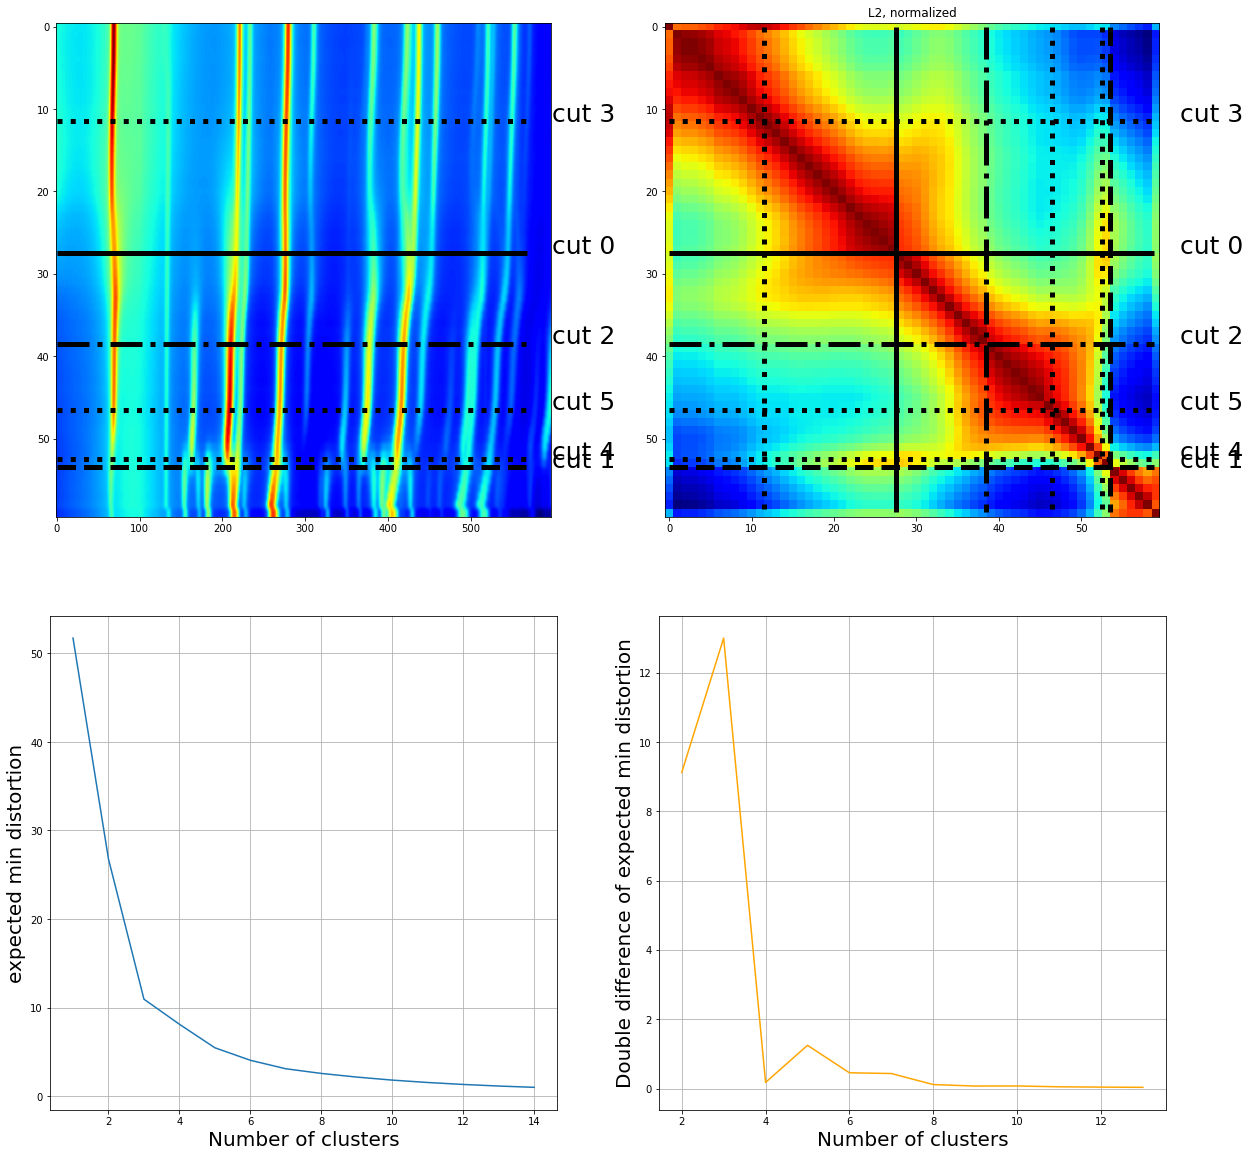

In [118]:
simtype = 'Cosine'
scaling = 'log'
linkage = 'ward'
ctype = 'agglom'

feature_csims1, o_cuts = feat.sims_with_boundaries(patterns, get_activations(fast_q * (fast_q > 0)),np.mean(X_samples, axis = 0).T, n = 7, simtype = simtype, extra_label='',
                    ctype = ctype, linkage = linkage, affinity = 'euclidean')

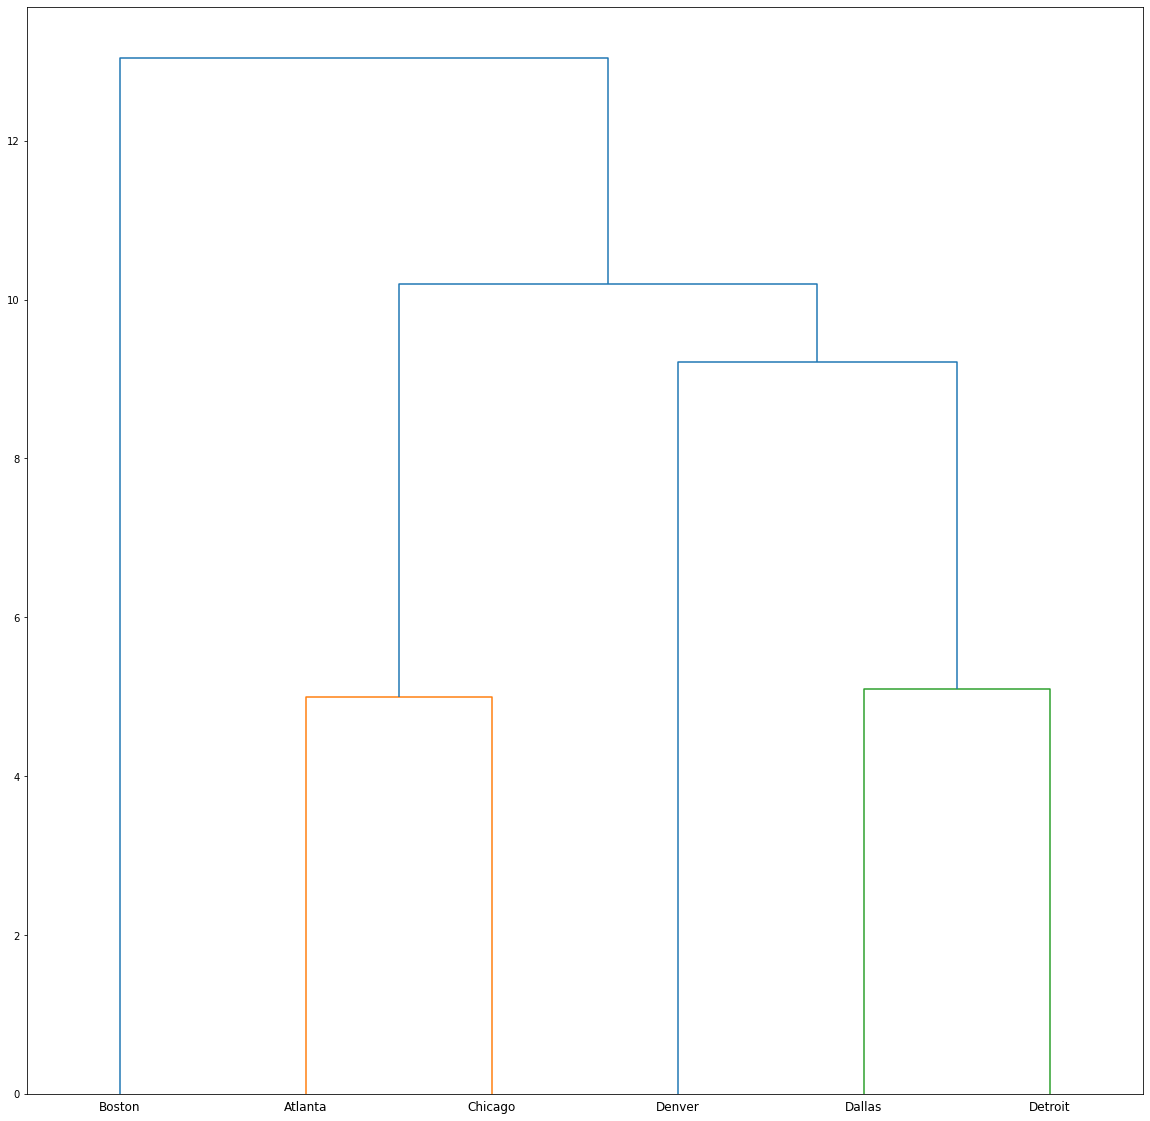

In [17]:
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

data = [[24, 16], [13, 4], [24, 11], [34, 18], [41, 
6], [35, 13]]
frame = pd.DataFrame(np.array(data), columns=["Rape", 
"Murder"], index=["Atlanta", "Boston", "Chicago", 
"Dallas", "Denver", "Detroit"])

Z = hierarchy.linkage(frame, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z, labels=frame.index)

In [9]:
act = activations_n1_simple

X = act.T

In [11]:
def l2_pairs(a):
    """
    Calculate L2 distances.
    """
    #b = b.reshape((b.shape[0], 1, a.shape[1]))
    b = a.reshape((a.shape[0], 1, a.shape[1]))
    dist_l2 = np.sqrt(np.einsum("ijk, ijk->ij", a - b, a - b))
    return dist_l2

In [ ]:
import pandas as pd

In [520]:
# initialization
#distances, ids, clusters, c_sizes
outputs = [agglom_step(*get_init(X)) for X in X_samples]
_, _, _, sizes_tmp, _ = outputs[0]
c_probs = np.ones_like(sizes_tmp)

def boot_step(outputs, c_probs):
    # update probabilities
    idx_draws = [(o[-1],) for o in outputs]
    #idx_draws = [o[-1] for o in outputs]

    draw_counts = pd.DataFrame(idx_draws).value_counts().sort_values()

    imerge, jmerge = draw_counts.sort_values().index[-1][0]

    draw_probs = draw_counts / draw_counts.sum()

    #new_prob = draw_probs[(imerge, jmerge)].iloc[0] * np.prod(c_probs[[imerge, jmerge]])

    # use this output for the next agglo clustering iteration 
    for i, (_, _, _, _, idx_pair) in enumerate(outputs):
        if idx_pair == (imerge, jmerge):
            imatch = i
            break
    #distances_tmp, ids_tmp, clusters_tmp, c_sizes_tmp = outputs[imatch]
    
    idx_other = np.array(list(set(list(range(len(c_probs)))) - set([imerge, jmerge])))
#     # TODO
#     # pd.DataFrame(draw_probs.iloc[:-1], columns = ['prob']).reset_index()
#     other_probs = c_probs[idx_other]
#     c_probs_tmp = np.hstack((new_prob, other_probs))

    outputs_tmp = [agglom_step(*output) for output in outputs]
    return outputs_tmp, c_probs#c_probs_tmp








def get_new_distance(new_size, imerge, jmerge, k, c_sizes, distances):
    N = (new_size + c_sizes[k])
    ai = ((c_sizes[imerge] + c_sizes[k]) / N)
    aj = ((c_sizes[jmerge] + c_sizes[k]) / N)
    b = ((c_sizes[k]) / N)
    return ai * distances[imerge, k] + aj * distances[jmerge, k] - b * distances[imerge, jmerge]

def agglom_step(distances, ids, clusters, c_sizes, *args):
    imerge, jmerge = np.unravel_index(np.argmin(distances, axis=None), distances.shape)

    newcluster = np.vstack((clusters[imerge], clusters[jmerge]))
    
    newcluster_ids = np.concatenate(ids[[imerge, jmerge]])[None, :]

    idx_other = np.array(list(set(list(range(len(clusters)))) - set([imerge, jmerge])))

    otherclusters = [clusters[idx] for idx in idx_other]

    otherclusters_ids = ids[idx_other]

    new_size = c_sizes[[imerge, jmerge]].sum()
    others_sizes = c_sizes[idx_other]

    # calculate new pairwise distance matrix
    #new_distances_ij = np.array([get_new_distance(new_size, imerge, jmerge, , c_sizes) for k in idx_other])
    new_distances_ij = get_new_distance(new_size, imerge, jmerge, idx_other, c_sizes, distances)
    distances_tmp = distances[np.ix_(idx_other.ravel(), idx_other.ravel())]
    distances_tmp = np.hstack((
          np.vstack(([np.inf], new_distances_ij[:, None])),
          np.vstack((new_distances_ij, distances_tmp))))

    clusters_tmp = np.array([newcluster] + otherclusters, dtype = object)

    ids_tmp = np.array(list(newcluster_ids) + list(otherclusters_ids), dtype = object)

    c_sizes_tmp = np.hstack((new_size, c_sizes[idx_other]))
    
    
    return distances_tmp, ids_tmp, clusters_tmp, c_sizes_tmp, (imerge, jmerge)

In [521]:
# initialization
def get_init(X):
    ids = np.arange(len(X))[:, None]

    clusters = np.empty(shape = len(X), dtype = object)
    clusters.fill(X[:, None])
    #clusters = list(X[:, None])
    distances = feat.l2_pairs(X)
    c_sizes = np.ones(len(clusters))#np.array(misc.deepmap(clusters, lambda clust: len(clust), level = 1))
    np.fill_diagonal(distances, np.inf)
    return distances, ids, clusters, c_sizes

In [522]:
for _ in range(54):
    outputs, c_probs = boot_step(outputs, c_probs);

In [523]:
final_clusters = np.vstack([o[1] for o in outputs])

In [524]:
nclust = len(final_clusters[0])

In [525]:
nclust

5

In [365]:
def print_cluster_stats(i):
    sets_i = list(map(set, final_clusters[:, i]))
    setsims = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            setsims[i, j] += int(sets_i[i] == sets_i[j])

    ss = setsims.sum(axis = 0)

    highest_prob = np.argsort(ss)[-1]

    print('cluster:', sets_i[highest_prob])
    print('with probability:', ss.max(), 'percent')

In [526]:
def boundary_freq(i):
    sets_i = np.array(list(map(lambda x: np.array((np.max(x), np.min(x))), final_clusters[:, i])))
    return sets_i[:, 0], sets_i[:, 1]
#     setsims = np.zeros((N, N))
    
#     for i in range(N):
#         for j in range(N):
#             setsims[i, j] += int(sets_i[i] == sets_i[j])

#     ss = setsims.sum(axis = 0)

#     highest_prob = np.argsort(ss)[-1]
    return sets_i

In [536]:
x, y = list(map(lambda x: np.hstack(x), list(zip(*[boundary_freq(i) for i in range(nclust)]))))
#x, y = np.hstack((x, y)), np.hstack((y, x))

In [537]:
vc = pd.DataFrame([x, y]).T.value_counts()

In [538]:
x, y = np.array(list(vc.index)).T
z = vc.values

In [576]:
plt.hlines?

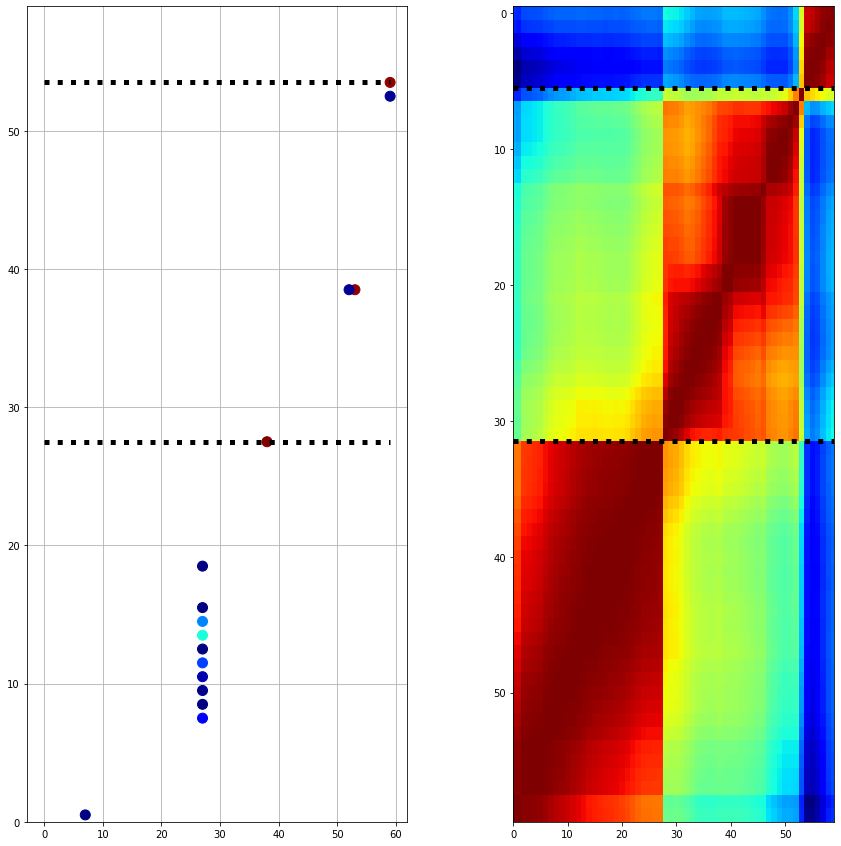

In [603]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]
a, b = 1, 2
plt.subplot(a, b, 1)
plt.scatter(x, y - .5, c = z / 2000, cmap = 'jet', s = 100)
plt.grid()
plt.ylim(0, 59)
plt.hlines(60 - 6.5, [0], [59], 'k', linewidth=5, linestyle = 'dotted')
plt.hlines(27.5, [0], [59], 'k', linewidth=5, linestyle = 'dotted')

#plt.colorbar()

plt.subplot(a, b, 2)
plt.imshow(feat.csim_pairs(act.T)[::-1, :], cmap = 'jet', aspect = 2.5)
plt.xlim(0, 59)
plt.hlines(5.5, [0], [59], 'k', linewidth=5, linestyle = 'dotted')
plt.hlines(60 - 28.5, [0], [59], 'k', linewidth=5, linestyle = 'dotted')


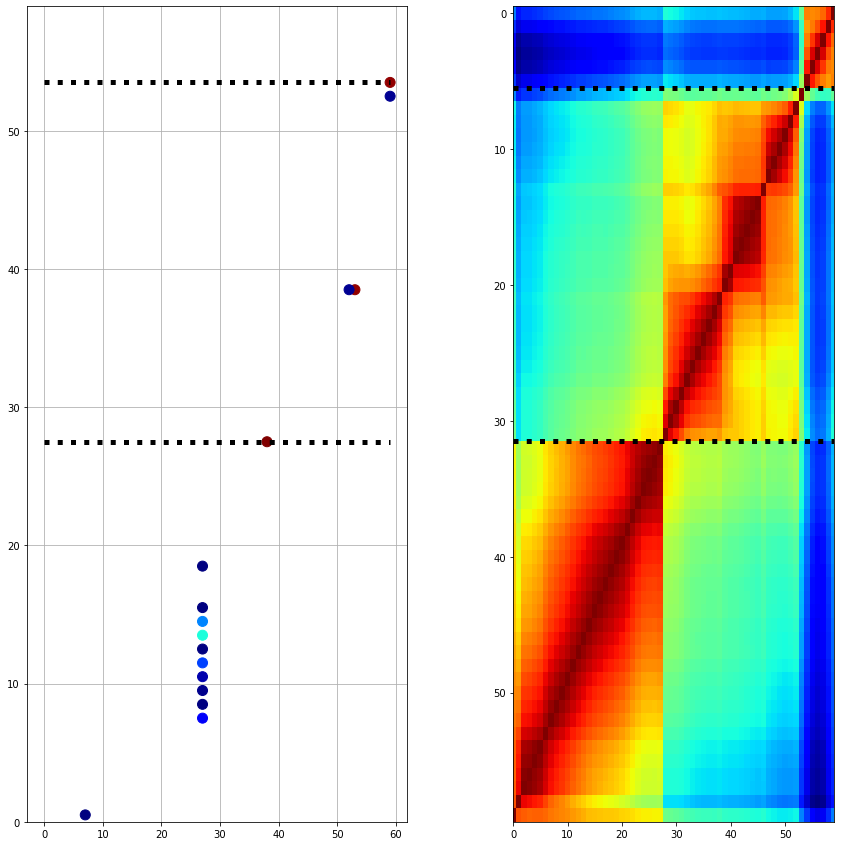

In [605]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]
a, b = 1, 2
plt.subplot(a, b, 1)
plt.scatter(x, y - .5, c = z / 2000, cmap = 'jet', s = 100)
plt.grid()
plt.ylim(0, 59)
plt.hlines(60 - 6.5, [0], [59], 'k', linewidth=5, linestyle = 'dotted')
plt.hlines(27.5, [0], [59], 'k', linewidth=5, linestyle = 'dotted')

#plt.colorbar()

plt.subplot(a, b, 2)
plt.imshow(feat.l2_sim(act.T)[::-1, :], cmap = 'jet', aspect = 2.5)
plt.xlim(0, 59)
plt.hlines(5.5, [0], [59], 'k', linewidth=5, linestyle = 'dotted')
plt.hlines(60 - 28.5, [0], [59], 'k', linewidth=5, linestyle = 'dotted')


<IPython.core.display.Javascript object>


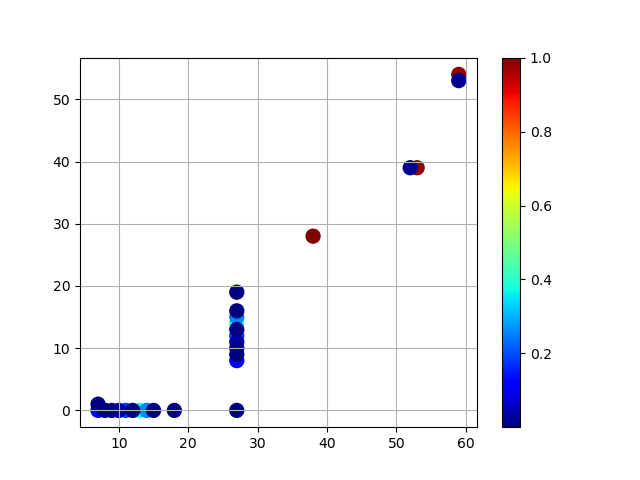

In [540]:
%matplotlib notebook
plt.scatter(x, y, c = z / 2000, cmap = 'jet', s = 100)
plt.grid()
plt.colorbar()

In [ ]:
plt.imshow()

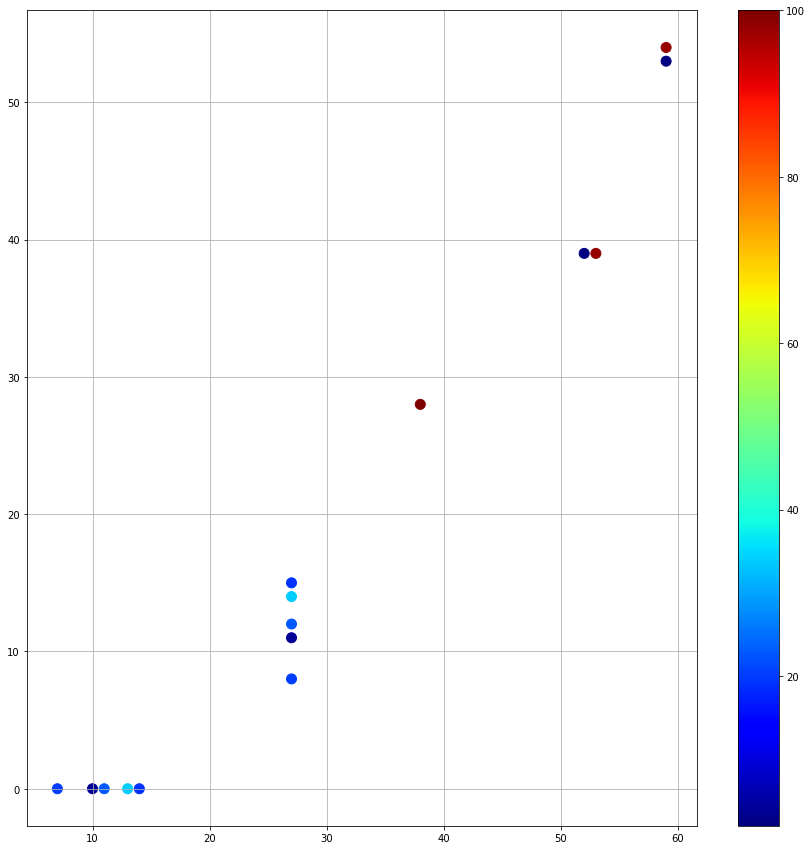

In [511]:
plt.scatter(x, y, c = z, cmap = 'jet', s = 100)
plt.grid()
plt.colorbar()

In [459]:
x, y = np.hstack((x, y)), np.hstack((y, x))

In [460]:
y = y - x

In [462]:
#y[y < 0] = np.nan

In [445]:
x

array([53, 53, 53, 53, 27, 53, 53, 53, 53, 53, 53, 53, 52, 27, 53, 53, 53,
       53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 27, 53, 53, 53, 53, 53, 27,
       53, 53, 53, 53, 53, 53, 53, 27, 53, 53, 53, 53, 53, 27, 53, 53, 53,
       53, 53, 53, 53, 53, 53, 52, 53, 53, 53, 53, 53, 53, 27, 53, 53, 27,
       53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 27, 53, 53, 53, 53, 53,
       53, 53, 53, 53, 53, 53, 53, 27, 53, 53, 53, 53, 27, 53, 53, 13, 27,
       13, 14, 53, 27, 13, 13, 27, 14, 14, 13, 59, 53, 13, 14, 27, 27, 13,
       27, 27, 14, 13, 14, 14, 13, 27, 53, 13, 27, 27, 27, 13, 53, 13, 14,
       27, 27, 14, 27, 14, 53, 13, 27, 14, 13, 14, 53, 27, 27, 13, 14, 14,
       13, 13, 27, 13, 14, 13, 27, 27, 13, 14, 27, 53, 27, 27, 53, 27, 27,
       27, 13, 13, 13, 14, 13, 27, 27, 13, 53, 13, 27, 27, 27, 27, 27, 13,
       13, 13, 13, 13, 27, 53, 27, 14, 13, 13, 53, 27, 14, 27, 38, 27, 27,
       38, 11, 27, 27, 11, 27, 27, 27, 13, 38, 27, 27, 11, 38, 27, 38, 11,
       27, 27, 27, 27, 27

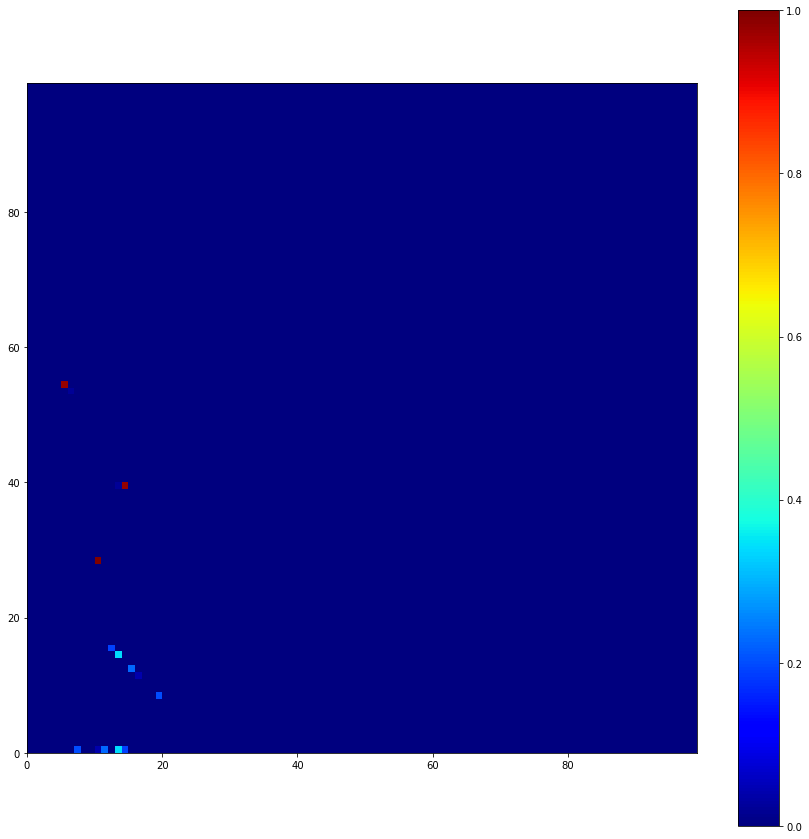

In [463]:
H, xe, ye = np.histogram2d(x, y, bins = [np.arange(N), np.arange(N)])

plt.rcParams["figure.figsize"]=(15, 15)
# TODO handle missing data
img = H / N
#img = np.log(1 + H)
plt.imshow(img, interpolation='nearest', origin='lower', extent=[xe[0], xe[-1], ye[0], ye[-1]], cmap = 'jet')
plt.colorbar()

In [ ]:
np.histogram2d()

In [369]:
for i in range(nclust):
    print_cluster_stats(i)

cluster: {39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53}
with probability: 87.0 percent
cluster: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
with probability: 33.0 percent
cluster: {14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}
with probability: 33.0 percent
cluster: {32, 33, 34, 35, 36, 37, 38, 28, 29, 30, 31}
with probability: 70.0 percent
cluster: {54, 55, 56, 57, 58, 59}
with probability: 88.0 percent


In [378]:
final_clusters[0]

array([array([49, 50, 51, 47, 48, 52, 53, 41, 42, 43, 44, 45, 46, 39, 40]),
       array([ 4,  5,  2,  3,  1,  0,  7,  8,  6,  9, 10, 12, 13, 11]),
       array([15, 16, 14, 17, 18, 19, 20, 21, 24, 25, 26, 27, 22, 23]),
       array([33, 34, 35, 36, 31, 32, 37, 38, 29, 30, 28]),
       array([56, 57, 58, 54, 55, 59])], dtype=object)

In [377]:
np.array([[(list(c)[0], list(c)[-1]) for c in final_clusters[i]] for i in range(len(final_clusters))])#.ravel()

array([[[49, 40],
        [ 4, 11],
        [15, 23],
        [33, 28],
        [56, 59]],

       [[51, 40],
        [17, 23],
        [29, 38],
        [ 4, 10],
        [57, 54]],

       [[50, 40],
        [ 4, 13],
        [15, 23],
        [33, 28],
        [56, 59]],

       [[49, 40],
        [ 6,  3],
        [21, 23],
        [29, 38],
        [55, 59]],

       [[15, 23],
        [49, 40],
        [35, 28],
        [56, 59],
        [ 0,  7]],

       [[51, 40],
        [12, 23],
        [ 4,  7],
        [35, 28],
        [54, 58]],

       [[50, 40],
        [ 4, 11],
        [15, 23],
        [35, 28],
        [54, 58]],

       [[49, 40],
        [ 4, 11],
        [15, 23],
        [29, 38],
        [54, 58]],

       [[49, 40],
        [17, 23],
        [ 4,  7],
        [33, 28],
        [54, 59]],

       [[49, 40],
        [ 4, 14],
        [17, 23],
        [29, 38],
        [54, 59]],

       [[49, 40],
        [ 4, 14],
        [17, 23],
        [35, 28],
        

In [256]:
draw_counts = pd.DataFrame(idx_draws).value_counts().sort_values()

In [258]:
imerge, jmerge = draw_counts.sort_values().index[-1][0]

In [259]:
draw_probs = draw_counts / draw_counts.sum()

In [223]:
new_prob = draw_probs[(imerge, jmerge)].iloc[0] * np.prod(c_probs[[imerge, jmerge]])

In [263]:
# TODO
# pd.DataFrame(draw_probs.iloc[:-1], columns = ['prob']).reset_index()
other_probs = c_probs[idx_other]

c_probs_tmp = np.hstack((new_prob, other_probs))

In [270]:
c_probs_tmp

array([0.96, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  ])

In [203]:
#     imerge, jmerge = np.unravel_index(np.argmin(distances, axis=None), distances.shape)

#     newcluster = np.vstack((clusters[imerge], clusters[jmerge]))
    
#     newcluster_ids = np.concatenate(ids[[imerge, jmerge]])[None, :]

#     idx_other = np.array(list(set(list(range(len(clusters)))) - set([imerge, jmerge])))

#     otherclusters = [clusters[idx] for idx in idx_other]

#     otherclusters_ids = ids[idx_other]

#     new_size = c_sizes[[imerge, jmerge]].sum()
#     others_sizes = c_sizes[idx_other]

#     # calculate new pairwise distance matrix
#     #new_distances_ij = np.array([get_new_distance(new_size, imerge, jmerge, , c_sizes) for k in idx_other])
#     new_distances_ij = get_new_distance(new_size, imerge, jmerge, idx_other, c_sizes, distances)
#     distances_tmp = distances[np.ix_(idx_other.ravel(), idx_other.ravel())]
#     distances_tmp = np.hstack((
#           np.vstack(([np.inf], new_distances_ij[:, None])),
#           np.vstack((new_distances_ij, distances_tmp))))

#     clusters_tmp = np.array([newcluster] + otherclusters, dtype = object)

#     ids_tmp = np.array(list(newcluster_ids) + list(otherclusters_ids), dtype = object)

#     c_sizes_tmp = np.hstack((new_size, c_sizes[idx_other]))

In [163]:
# distances_tmp, ids_tmp, clusters_tmp, c_sizes_tmp, merge_idxs = agglom_step(distances, ids, clusters, c_sizes)

In [14]:
for _ in range(55):
    distances, ids, clusters, c_sizes = agglom_step(distances, ids, clusters, c_sizes)

In [212]:
%pdb

Automatic pdb calling has been turned ON


In [80]:
def do(distances, ids, clusters, c_sizes):
    for _ in range(55):
        distances, ids, clusters, c_sizes = agglom_step(distances, ids, clusters, c_sizes)
    return distances, ids, clusters, c_sizes

In [145]:
%timeit -n 1 -r 1 do(distances, ids, clusters, c_sizes)

5.48 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [60]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
%timeit -n 1 -r 1 clustering = AgglomerativeClustering(n_clusters=5).fit(X)

411 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


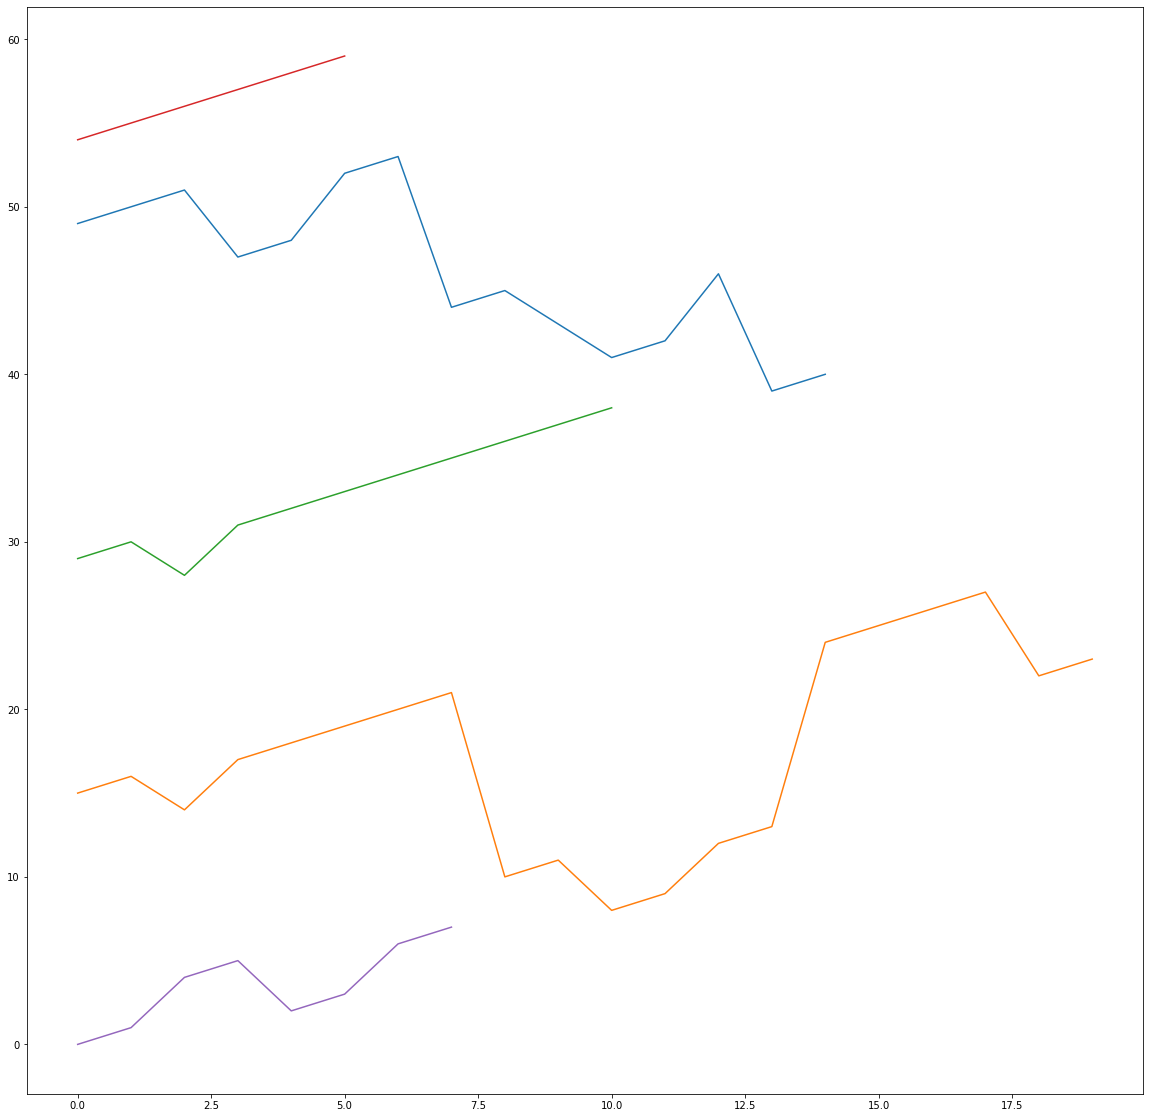

In [15]:
for row in ids:
    plt.plot(row)

In [35]:
ids, c_sizes

(array([array([49, 50, 51, 47, 48, 52, 53, 44, 45, 43, 41, 42, 46, 39, 40]),
        array([15, 16, 14, 17, 18, 19, 20, 21, 10, 11,  8,  9, 12, 13, 24, 25, 26,
               27, 22, 23])                                                       ,
        array([29, 30, 28, 31, 32, 33, 34, 35, 36, 37, 38]),
        array([54, 55, 56, 57, 58, 59]), array([0, 1, 4, 5, 2, 3, 6, 7])],
       dtype=object),
 array([15, 20, 11,  6,  8]))

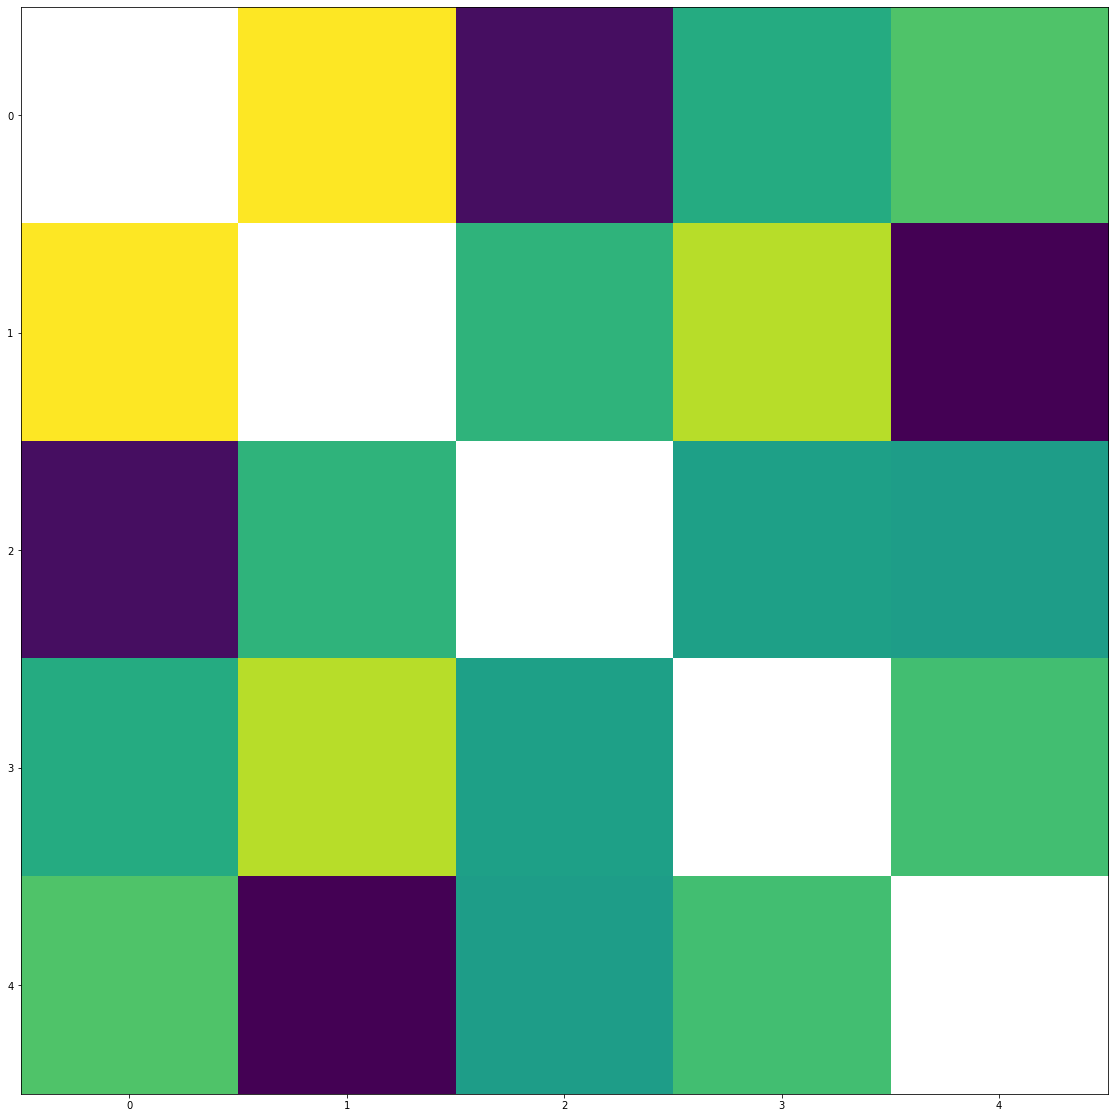

In [37]:
plt.imshow(distances)

In [38]:
#https://stackoverflow.com/questions/22927181/selecting-specific-rows-and-columns-from-numpy-array
#np.ix_(otherclusters_ids.ravel(), otherclusters_ids.ravel())